# <span style="color:orange">Atomic Spectroscopy</span>
Project-based laboratory exercise in the course Atomic Physics (FAFF55)
### Names: Filip Brunmark Bernhard Helsing
## Table of Content
 [Introduction](#Introduction)
* [1.The spectrum of Hydrogen](#Hydrogen)
  * [1.1 Open the spectrum](#Hydrogen_Step_1)
  * [1.2 Gaussian fit](#Hydrogen_Step_2)
  * [1.3 Calculate Rydberg constant](#Hydrogen_Step_3)
  * [1.4 Discussion](#Hydrogen_Step_4)
* [2.The quantum defect](#quantum_defect)
  * [2.1 Open the Na spectrum](#quantum_1)  
  * [2.2 Open a saturated spectrum](#quantum_2) 
  * [2.3 Calculate experimental values for the quantum defect](#quantum_3) 
  * [2.4 Calculate the vacuum wavelength for the 3p – 8d transition](#quantum_4)  
  * [2.4 Discussion](#quantum_5)  
* [3.Fine structure](#fine_structure)  
  * [3.1 Open file and identify peaks](#fine_structure_1)  
  * [3.2 Conduct the analysis](#fine_structure_2)    
  * [3.2 Discussion](#fine_structure_3)
--------------------------------------------------------------------------------------------------------------

## Introduction <a name="Introduction"></a>
This Jupyter Notebook is meant to conduct the anaylsis as well as to present the results of the atomic spectroscopy lab. Generally all code provided is a guideline in order to get your analysis started. In case you want to use your own methods, feel free to change as much of the code as  you like. Each of the three tasks starts with the analysis of the data, followed by some calculations and ends with a discussion. The first task provides a lot of the code needed, whereas in the last part most of the coding is up to you. 
<br>

**Before you can run any part, you need to import the modules below (shift + enter):**



In [404]:
# Packages to access files in the system
import sys, os

# Package that supports mathmatical operations on arrays
import numpy as np  

# Package that supports operations for data structures and numeric tables
import pandas as pd

# Package for plotting; 
# first line makes plots interactive, 
# second actually loads the library
%matplotlib notebook
import matplotlib.pyplot as plt

# Function that fits a curve to data 
from scipy.optimize import curve_fit

sys.path.append('./lib')
import fittingFunctions

--------------------------------------------------------------------------------------------------------------

In [405]:
## CONSTANTS 
h_eV = 4.135667696e-15
h = 6.62607015e-34
c = 299792458 
R = 10973731.568160
R_H = R * 1.007276466879  / (1.007276466879 + 5.48579909065e-4)

# <span style="color:orange">1. The spectrum of Hydrogen</span> <a name="Hydrogen"></a>
## 1.1 The spectrum of Hydrogen<a name="Hydrogen_Step_1"></a>
Record a spectrum of the hydrogen lamp using the spectrometer channel with large range. Make sure the measurement is strong, but not saturated. Save the data as ASCII file and transfer them to the computer on which you have your Jupyter Notebook. With the function  `read ` from package  `pandas ` one loads in the experimental data. To do this, you have to specify the data path and file name accordinlgy in the field below. Please mind that the **absolute path** must be specified using `/` instead of `\`.

<IPython.core.display.Javascript object>


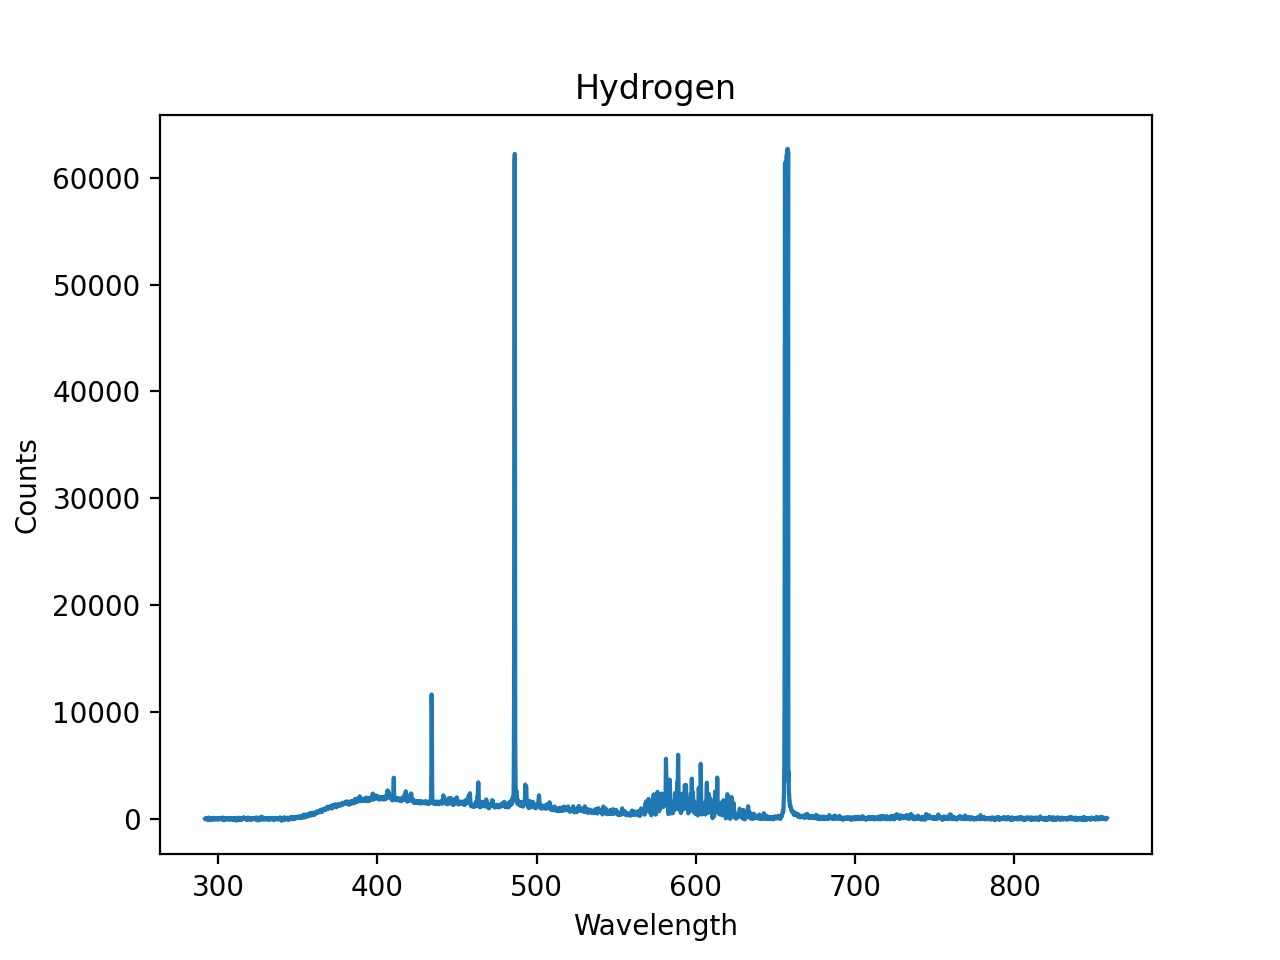

Text(0, 0.5, 'Counts')

In [406]:
# Specify the absolute path for the hydrogen spectrum inside quotation marks:
##UNSATURATED
## df = pd.read_csv("/Users/filipbrunmark/Atomfysik/FAFF55_Atomic_Spectroscopy_Jupyter_2022/Results/Hydrogen_m2_l4.txt",
##SATURATED
df = pd.read_csv("/Users/filipbrunmark/Atomfysik/FAFF55_Atomic_Spectroscopy_Jupyter_2022/Results/Hydrogen_saturated_m3_l4.txt",  
    sep=";",    # Here we specify that values are seperated by semicolons.
    header=6,   # This skips the first rows of the file containing information about the acquisiton settings
                 
    # Check if your spectrum txt file contains of 4 or 5 coulumns. If you have 5 coulumns use the adapted 'names'-array the line below.        
    names=["Wavelength", "Count sample", "Background", "Reference", "Scope"])
    # names=["Wavelength", "Count sample", "Background", "Reference", "Corrected for dark"])

df = df.stack().str.replace(',','.').unstack() # Turns the  ',' in the data frame to a point
data = df.to_numpy() #Converts the data frame into an Numpy array
wavelength = np.array(list(data[:, 0]), dtype=float) # Turns the Numpy 2d array with the wavelengths in a regular 2D float array
counts = np.array(list(data[:, 4]), dtype=float) # If you have saved 5 coulumns, use the 'Corrected for dark values' by changing the '1' to a '4'.

plt.figure()
plt.plot(wavelength, counts)
plt.show()
plt.title("Hydrogen")      # set title of the plot
plt.xlabel("Wavelength")   # set label for x-axis 
plt.ylabel("Counts")       # set label for Y-axis 

## 1.2 Gaussian fit<a name="Hydrogen_Step_2"></a>
Perform a Gaussian fit on the peaks in order to exactly determine the position of the peaks. You have to specify the region in which the Gaussian fit shall be performed. Adapt the other parameters (mu_guess, A_guess and sigma_guess) to successfuly run the fit. 

<IPython.core.display.Javascript object>


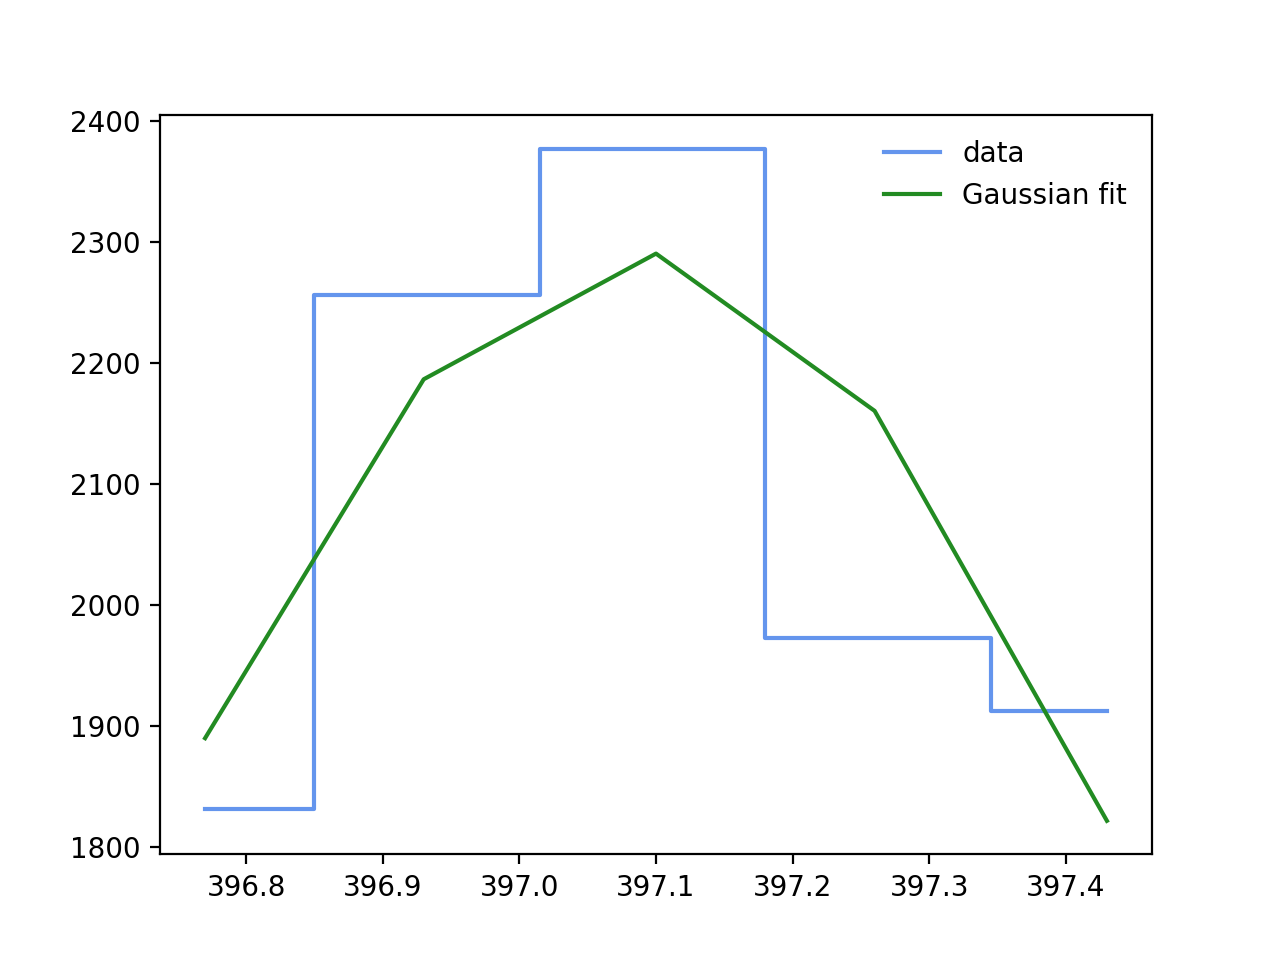

Estimated parameters:
 A = 2291.15271, mu = 397.08558,  sigma = 0.50856 

Uncertainties in the estimated parameters: 
 σ²(A) = 15245.23986, σ²(mu) = 0.00198, σ²(sigma) = 0.01226 

Covariance matrix: 
 [[ 1.52452399e+04  3.07587352e-01 -9.93923144e+00]
 [ 3.07587352e-01  1.98426537e-03 -5.39702211e-04]
 [-9.93923144e+00 -5.39702211e-04  1.22591140e-02]]


In [407]:
peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=396.75,   # bins where to start fitting
                                              region_stop=397.59,    # bins where to stop fitting
                                              mu_guess=397,       # guess for the position of peak centroid
                                              A_guess= 2400,       # guess for the amplitude of the peak
                                              sigma_guess= 0.1)      # guess for the sigma

  * Extract the peak position `mu`. Repeat the fit for as many peaks that you are able to find. Insert the wavelength in the table below. Adapt the table length if you find more than five lines in the spectrum.  <br> 
  *  Identify the lines of the Balmer series using the NIST data base and assign them the correspoding transition. <br> 
  * Convert your values to vacuum wavelength. 

In [424]:
# Insert the extracted wavelength here.
hydrogen_air_wavelength = ([656.21300 , 486.13366, 434.07200 , 410.21248, 397.08558])
# Compare the number with the nist database and identify the transition.
hydrogen_transistions=(["n = 3", "n = 4", "n = 5", "n = 6", "n = 7"])

# Write a formula converting the values from the table above to vacuum wavelength.
# Procedure: hydrogen_wavelength_vac = hydrogen_wavelength_air / c_R = ; c_R = c_air / c_vac = 1 / 1.0003
hydrogen_vac_wavelength = list(map(lambda e: round(e * 1.0003,2), hydrogen_air_wavelength))

# Nothing to change below here:
pd.DataFrame([hydrogen_transistions, hydrogen_vac_wavelength], columns=['1', '2', '3','4', '5'], index=['Transition', 'Vacuum wavelength'])

1       2      3       4      5
Transition          n = 3   n = 4  n = 5   n = 6  n = 7
Vacuum wavelength  656.41  486.28  434.2  410.34  397.2

## 1.3 Calculate Rydberg constant<a name="Hydrogen_Step_3"></a>


Use your extracted data to determine an experimental value for the [Rydberg constant](https://en.wikipedia.org/wiki/Rydberg_constant) of hydrogen using the formula from the course book:
<br>
$  h \nu = \frac{h c}{\lambda}= R_{H}\left(\frac{1}{n_{1}^{2}}-\frac{1}{n_{2}^{2}}\right)$,
<br>
where  $n_{1}$ and $n_{2}$ are two consecutive quantum numbers. Use the empty code box below to write your own code to extract the Rydberg constant.

In [409]:
## Write your code here to determine the Rydberg constant
n_terms = list(map(lambda n: 1/4 - 1/(n**2), [3,4,5,6,7])) # 1/(n_1)^2 - 1/(n_2)^2
R_H_exp = list(map(lambda n_term, wave_length: (h * c * 10**9)/(n_term * wave_length) , n_terms, hydrogen_vac_wavelength))
R_H_mean = np.mean(R_H_exp)
print('1 Ry=', R_H_mean, 'J')
print('R_H(Theoretcial) = ', R_H, '1/m')
print('R_H(Experimental) =', R_H_mean/(h*c), '1/m')

sigma_R_H =  R_H - R_H_mean/(h*c) 
print('R_H(Theoretcial) - R_H(Experimental) =', sigma_R_H, '1/m')   

relative_error = (R_H - R_H_mean/(h*c)) / R_H

print('Relative error of mean =', relative_error)  
R_H_exp_Rel_Error = list(map(lambda R_H_EXP: (h*c*R_H - R_H_EXP)/(h*c*R_H) , R_H_exp))
print('Relative error =', R_H_exp_Rel_Error)



1 Ry= 2.1785574138001467e-18 J
R_H(Theoretcial) =  10967758.340281857 1/m
R_H(Experimental) = 10967111.970154317 1/m
R_H(Theoretcial) - R_H(Experimental) = 646.3701275400817 1/m
Relative error of mean = 5.8933658773837543e-05
Relative error = [-9.101391715385121e-05, 1.1757906987284215e-05, 6.725331437266314e-05, 0.00010245221632256289, 0.0002042187733402791]


## 1.4 Discussion <a name="Hydrogen_Step_4"></a>
Describe below the procedure (spectrometer settings) used for the experimental determination of result and any difficulties with the measurement, or how to overcome them. Compare the experimental value for the Rydberg constant with literature in a brief text. Perform an error estimation and discuss whether your result is reasonable.

### Procedure:

#### Spectrometer settings:
In order to obtain clear peaks on the spectrum the intensity in the measurement was adjusted such that the highest peaks were just below the saturation limit, at 64000. The hydrogen lamp was not very bright and therefore a high integration time was needed to be able to identify peaks of interest. However, the higher integration time made the measurement more sensitive to background noise and contamination. A correctly performed calibration and dark measurement was important. A lamp substance contamination is harder to eliminate, since one cannot make a measurement of just the contamination as a calibration. Many lamps were contaminated, so we had to use trial-and-error to find a clean lamp, and most contamination was eliminated. However, the background noise still made it difficult to identify low probability peaks.


#### Analyzing data(finding peaks of interest):
When analyzing the measurements from the experiment some of the peaks were less visible than others when given the spectrum and visual overlook. To find which peaks were of interest theoretical wavelengths for the lower level transitions were considered. After analyzing narrower intervals for the different transitions obvious peaks could be observed and so on the result was obtained from the experimental data.


### Rydberg constant and error estimation:
The theoretical constant is calculated from the formal definition, as written below. 

<br>
$ R_{H}^{\rm Teo} = \frac{m_p}{m_e + m_p} \frac{m_{e}e^4}{8\epsilon_{0}^{2} h^3 c}$
<br>

The absolute and relative error is calculated as shown below.

<br>
$ \sigma_{\rm Abs} = R_{H}^{\rm Teo} -  R_{H}^{\rm Exp} = 10967758.340281857 - 10967111.970154317 = 646.3701275400817 \quad m^{-1}$
<br>
<br>
$ \sigma_{\rm Rel} = \frac{R_{H}^{\rm Teo} -  R_{H}^{\rm Exp}}{R_{H}^{\rm Teo}} = 5.8933658773837543 \cdot 10^{-5} $
<br>

The result observed in the experiment deviates only by a factor 10e-5 indicating that the theory holds and the experiment was conducted correctly. Though it's a small error it's still an error. When analyzing it further it can be observed that the majority of the experimental Ryderberg constants calculated from the different transitions is located at a similar deviation from the theoretical constant, indicating a systematic error in the measurements. 



--------------------------------------------------------------------------------------------------------------
# <span style="color:orange">2. The quantum defect</span> <a name="quantum_defect"></a>
Plug in the sodium lamp in the lamp holder and measure a spectrum using the spectrometer channel with large range. 
Since sodium has a very intense feature, you need to record two spectra with different integration time. The unsaturated spectrum gives the wavelength of the intense line. The saturated spectrum (with the strong line being cut-off) will reveal the less intense features. Focus on the region between 430 and 630 nm when adjusting the intensity, ignoring the strong feature.

## 2.1 Open the full, unsaturated sodium spectrum <a name="quantum_1"></a>
Load in the spectrum that is not saturated (the strong feature not being cut off).

<IPython.core.display.Javascript object>


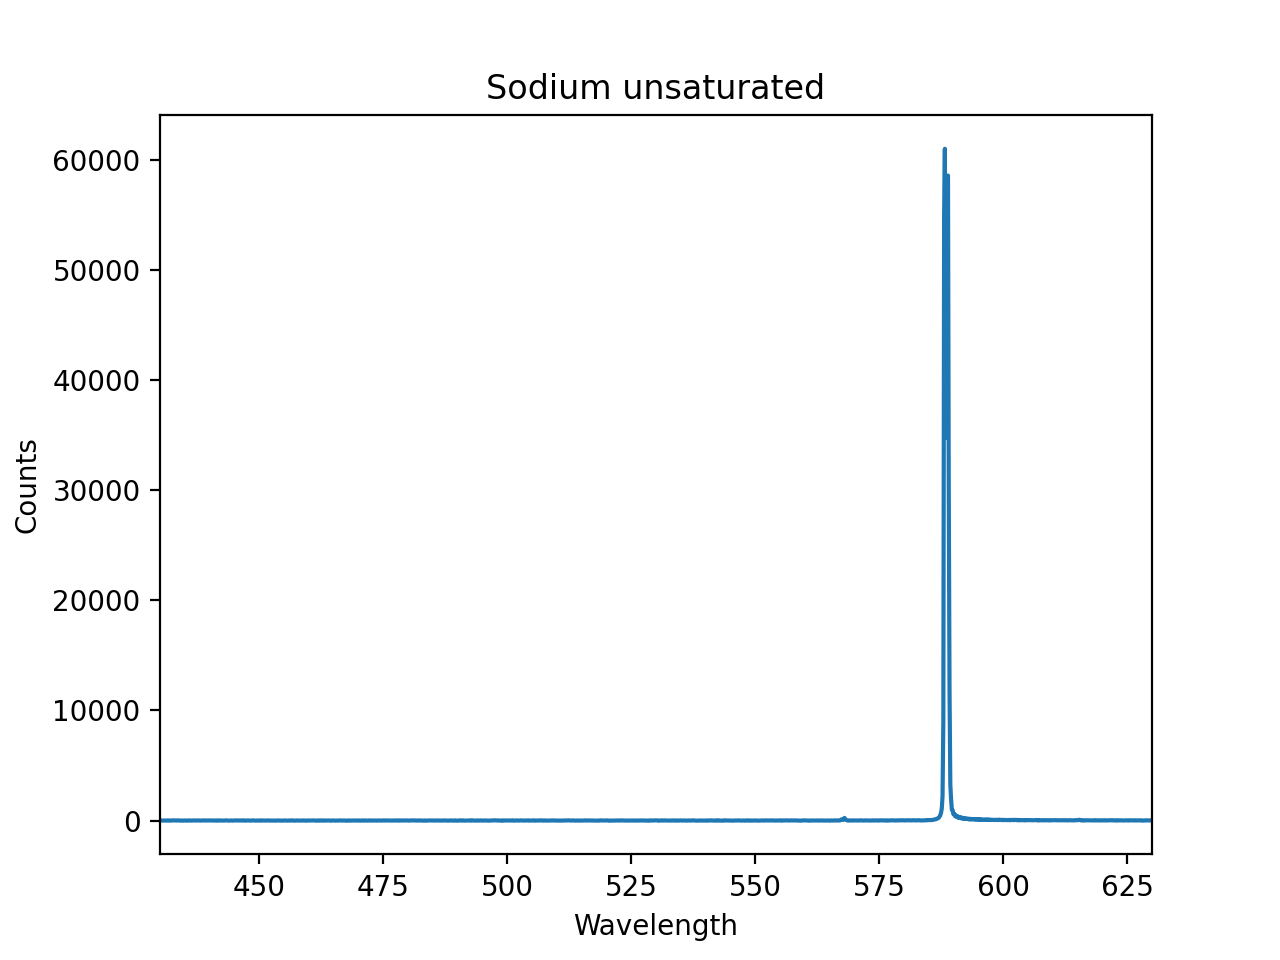

Text(0, 0.5, 'Counts')

In [410]:
# Specify the absolute path for the unsaturated sodium spectrum inside quotation marks:
df = pd.read_csv("/Users/filipbrunmark/Atomfysik/FAFF55_Atomic_Spectroscopy_Jupyter_2022/Results/Na_unsaturated.txt", 
    sep=";",    # Here we specify that values are seperated by semicolons.
    header=6,   # This skips the first rows of the file containing information about the acquisiton settings   

    # Check if your spectrum txt file contains of 4 or 5 coulumns. If you have 4 coulumns use the adapted 'names'-array the line below.        
    # names=["Wavelength", "Count sample", "Background", "Reference"])
    names=["Wavelength", "Count sample", "Background", "Reference", "Corrected for dark"])

df = df.stack().str.replace(',','.').unstack() # Turns the  ',' in the data frame to a point
data = df.to_numpy() #Converts the data frame into an Numpy array
wavelength = np.array(list(data[:, 0]), dtype=float) #Turns the Numpy 2d array in a regular 2D float array
counts = np.array(list(data[:, 4]), dtype=float) # If you have saved 5 coulumns, use the 'Corrected for dark values' by changing the '1' to a '4'.
plt.figure()
plt.plot(wavelength, counts)
plt.show()
plt.title("Sodium unsaturated")      # set title of the plot
plt.xlabel("Wavelength")   # set label for x-axis 
plt.xlim(430, 630)         # set range for x-axis
plt.ylabel("Counts")       # set label for Y-axis 

Analogue to the previous part, perform a Gaussian fit on the peaks in order to exactly determine the peak position.

<IPython.core.display.Javascript object>


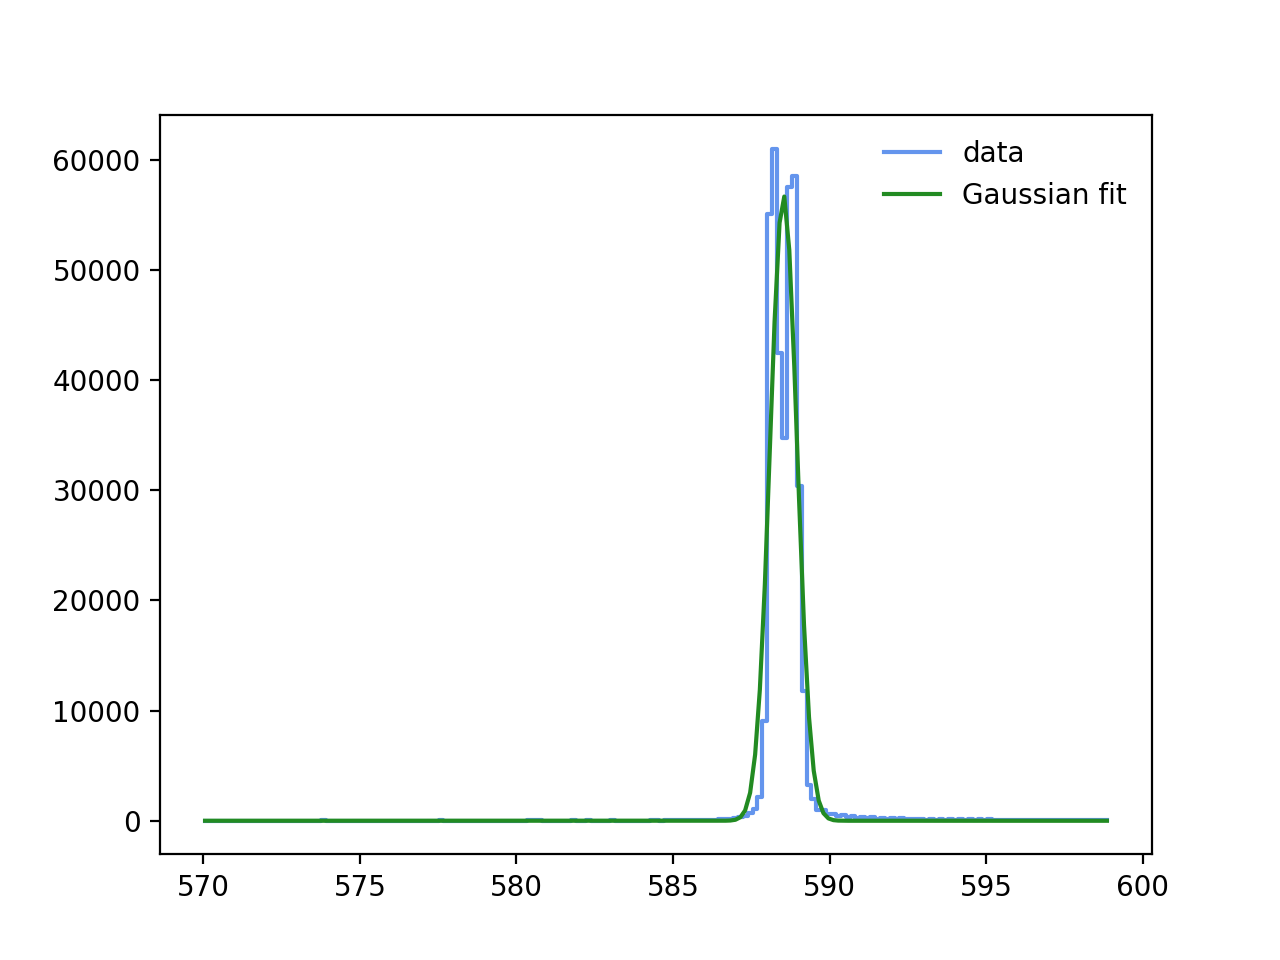

Estimated parameters:
 A = 56756.21402, mu = 588.52747,  sigma = 0.42836 

Uncertainties in the estimated parameters: 
 σ²(A) = 3421063.93063, σ²(mu) = 0.00026, σ²(sigma) = 0.00026 

Covariance matrix: 
 [[ 3.42106393e+06  1.31385772e-01 -1.72476576e+01]
 [ 1.31385772e-01  2.60205775e-04 -7.82496815e-07]
 [-1.72476576e+01 -7.82496815e-07  2.60778949e-04]]


In [411]:
peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=570,   # bins where to start fitting
                                              region_stop=599,    # bins where to stop fitting
                                              mu_guess=588,       # guess for the position of peak centroid
                                              A_guess=60000,       # guess for the amplitude of the peak
                                              sigma_guess=0.1)      # guess for the sigma

Extract the wavelength of all transitions for which n = 3 is the lower energy level. Enter your result in the table provided further down under section [2.3](#quantum_3). 

## 2.2 Open a saturated spectrum <a name="quantum_2"></a>
Load in the saturated spectrum at which you adjusted the intensity in the range between 430 nm and 630 nm, saturating the strong feature that had been determined before by the unsaturated measurement. Perform Gaussian fits in order to exactly determine the peak positions.

<IPython.core.display.Javascript object>


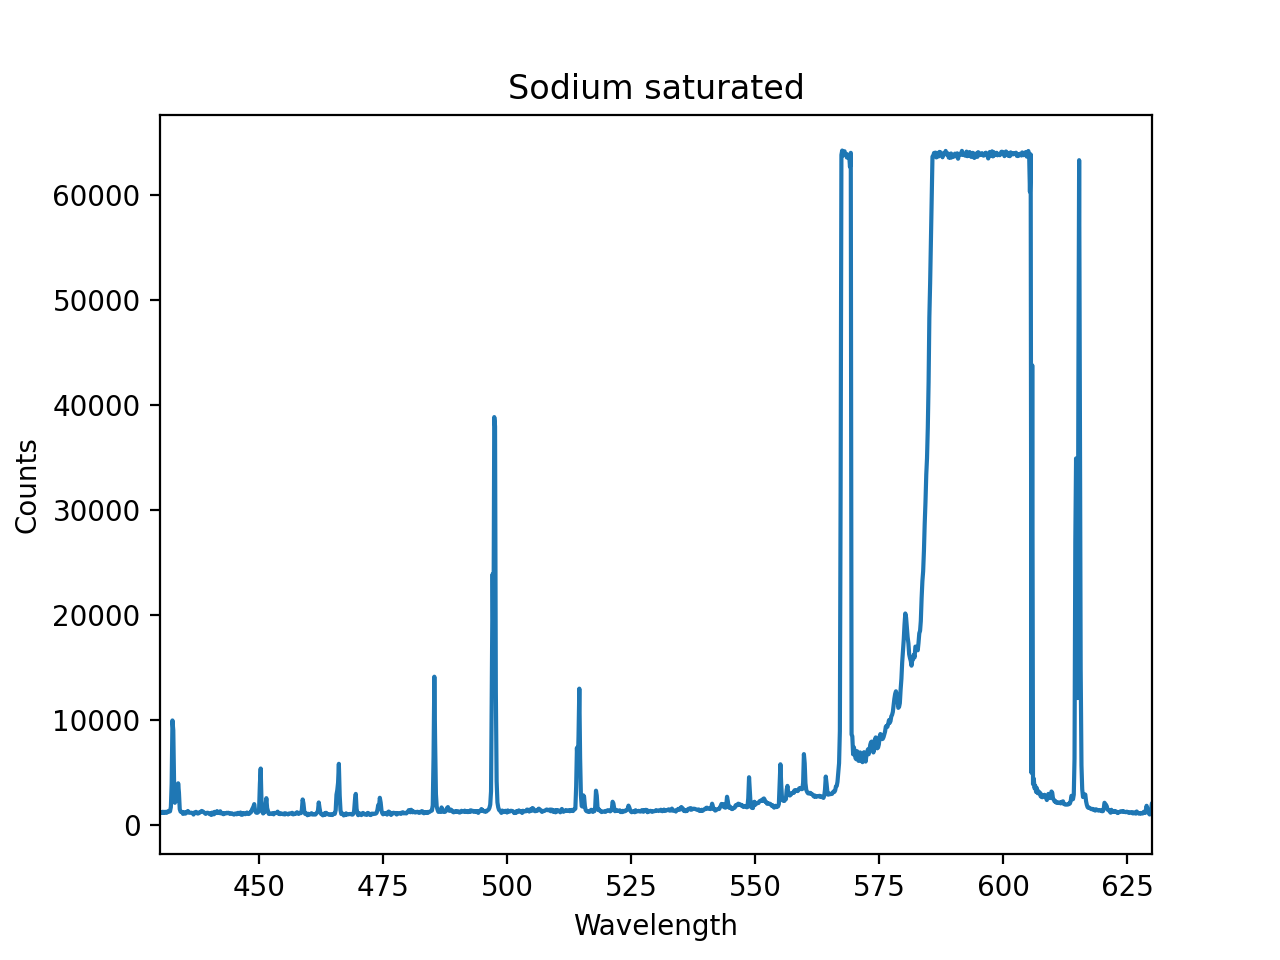

Text(0, 0.5, 'Counts')

In [412]:
# Specify the absolute path for the saturated sodium spectrum inside quotation marks:
df = pd.read_csv("/Users/filipbrunmark/Atomfysik/FAFF55_Atomic_Spectroscopy_Jupyter_2022/Results/Na_saturated2.txt", 
    sep=";",    # Here we specify that values are seperated by semicolons.
    header=6,   # This skips the first rows of the file containing information about the acquisiton settings

    # Check if your spectrum txt file contains of 4 or 5 coulumns. If you have 4 coulumns use the adapted 'names'-array the line below.        
    # names=["Wavelength", "Count sample", "Background", "Reference"])
    names=["Wavelength", "Count sample", "Background", "Reference", "Corrected for dark"])                 
                 
df = df.stack().str.replace(',','.').unstack() # Turns the  ',' in the data frame to a point
data = df.to_numpy() #Converts the data frame into an Numpy array
wavelength = np.array(list(data[:, 0]), dtype=float) #Turns the Numpy 2d array in a regular 2D float array
counts = np.array(list(data[:, 4]), dtype=float) # If you have saved 5 coulumns, use the 'Corrected for dark values' by changing the '1' to a '4'.

plt.figure()
plt.plot(wavelength, counts)
plt.show()
plt.title("Sodium saturated")      # set title of the plot
plt.xlabel("Wavelength")   # set label for x-axis 
plt.xlim(430, 630)         # set range for x-axis
plt.ylabel("Counts")       # set label for Y-axis 

<IPython.core.display.Javascript object>


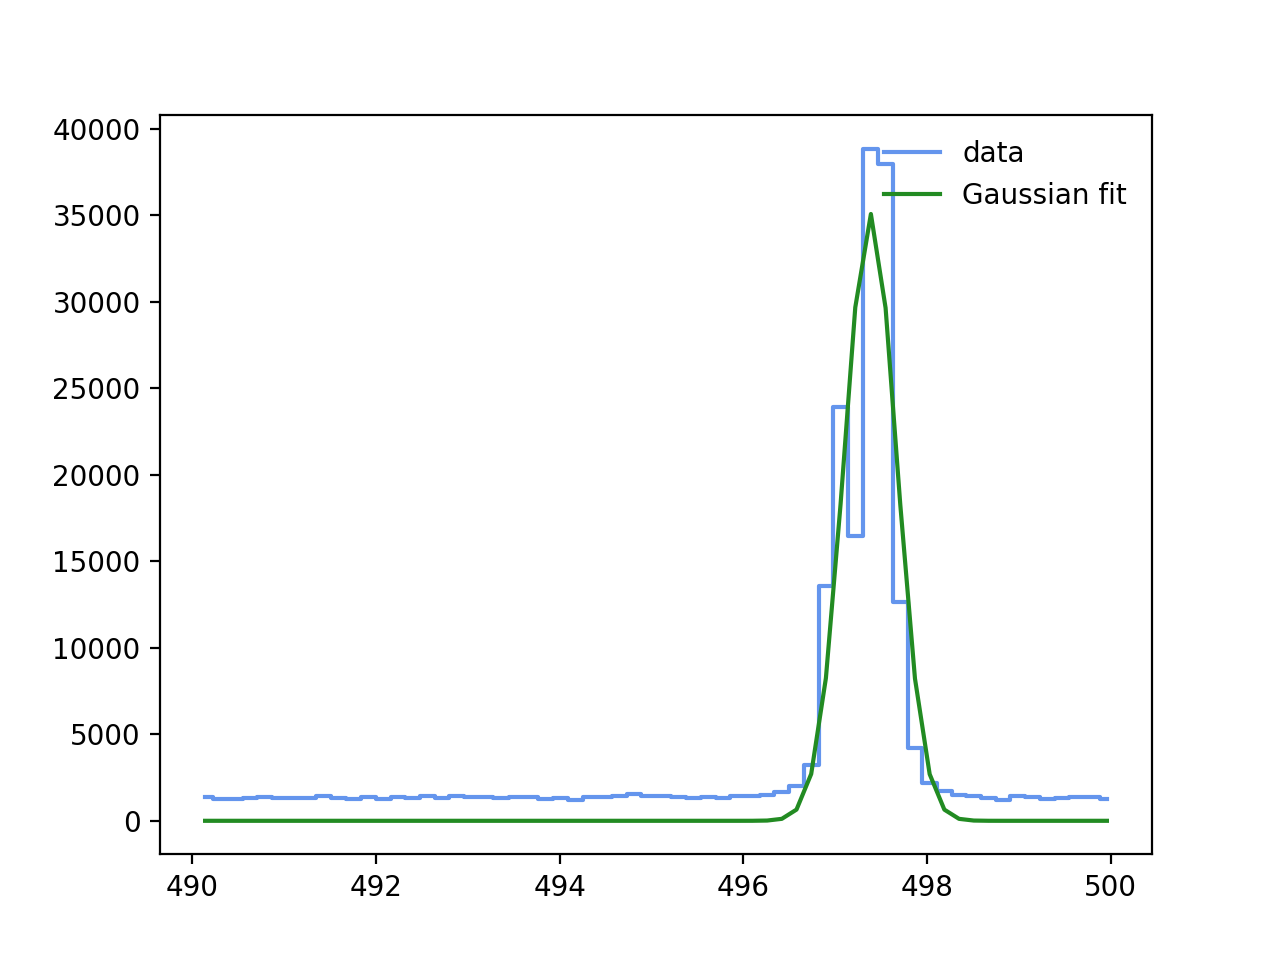

Estimated parameters:
 A = 35081.76107, mu = 497.38475,  sigma = 0.28484 

Uncertainties in the estimated parameters: 
 σ²(A) = 3825505.59863, σ²(mu) = 0.00033, σ²(sigma) = 0.00033 

Covariance matrix: 
 [[ 3.82550560e+06 -3.44844650e-01 -2.06593477e+01]
 [-3.44844650e-01  3.28308980e-04  1.86150906e-06]
 [-2.06593477e+01  1.86150906e-06  3.29911893e-04]]


In [413]:
peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start= 490,   # bins where to start fitting
                                              region_stop= 500,    # bins where to stop fitting
                                              mu_guess= 497,       # guess for the position of peak centroid
                                              A_guess= 12000,       # guess for the amplitude of the peak
                                              sigma_guess= 0.1)      # guess for the sigma

Identify all the small peaks, which are otherwise hidden in the noise. Again try to find as many transitions for which n = 3 is the lower energy level and enter the values in the table below, section [2.3](#quantum_3).

## 2.3 Calculate experimental values for the quantum defect <a name="quantum_3"></a>
Intentify the transistion, with n=3 is the lower energy level, using the [NIST data base](https://physics.nist.gov/PhysRefData/ASD/lines_form.html).

In [414]:
### Enter your results in the arrays below:
## The D-lines where calculated from the unsaturated measurement, rest of the lines where found using the saturated
## 588.82 3p j = 1/2 -> 3s j = 1/2
## 588.22 3p j = 3/2 -> 3s j = 1/2
sodium_wavelength = ([588.53, 615.288 , 567.92, 514.42, 497.38])
sodium_upperlevel=(["3p", "5s", "4d", "6s", "5d"])
sodium_lowerlevel=(["3s", "3p", "3p", "3p", "3p"])

# -> TODO <- write a formula converting the values from the table above to vacuum wavelength.
sodium_vac_wavelength = list(map(lambda e: round(e * 1.0003, 2), sodium_wavelength))
nist_sodium_vac_wavelength = ([589.30, 615.80 , 568.50, 515.1, 498.1])
diff_sodium_vac_wavelength = list(map(lambda nist_lambda, exp_lambda: nist_lambda - exp_lambda, nist_sodium_vac_wavelength, sodium_vac_wavelength))

pd.DataFrame([sodium_vac_wavelength, nist_sodium_vac_wavelength, diff_sodium_vac_wavelength, sodium_upperlevel, sodium_lowerlevel], columns=['1', '2', '3','4', '5'], index=['Vacuum wavelength / nm', 'NIST Vacuum wavelength / nm', 'NIST wavelength - Exp. wavelength', 'Upper level','Lower level'])

1       2       3       4       5
Vacuum wavelength / nm             588.71  615.47  568.09  514.57  497.53
NIST Vacuum wavelength / nm         589.3   615.8   568.5   515.1   498.1
NIST wavelength - Exp. wavelength    0.59    0.33    0.41    0.53    0.57
Upper level                            3p      5s      4d      6s      5d
Lower level                            3s      3p      3p      3p      3p

*  Use the field below to develop your own code to calculate the experimental values for the quantum defect $\delta{(l)}$. of all involved energy levels. For this, use the tabulated value for the first ionization energy of sodium.  Take the values over into the result table below. 
* Find literature values for the constants and write them in the table.

More information can be found in your textbook.

In [415]:
E_3s = 5.139076 ## eV
E_3p = E_3s - (h_eV*c*10**9)/(sodium_vac_wavelength[0])

delta_3p = 3 - (R_H * (E_3s/(h_eV*c) - (10**(9) / sodium_vac_wavelength[0]))**-1)**(1/2)
delta_5s = 5 - (R_H * (E_3p/(h_eV*c) - (10**(9) / sodium_vac_wavelength[1]))**-1)**(1/2)
delta_4d = 4 - (R_H * (E_3p/(h_eV*c) - (10**(9) / sodium_vac_wavelength[2]))**-1)**(1/2)
delta_6s = 6 - (R_H * (E_3p/(h_eV*c) - (10**(9) / sodium_vac_wavelength[3]))**-1)**(1/2)
delta_5d = 5 - (R_H * (E_3p/(h_eV*c) - (10**(9) / sodium_vac_wavelength[4]))**-1)**(1/2)

In [416]:
### Enter your results in the result table below:
Quantum_defect_exp = ([delta_3p , delta_5s, delta_4d , delta_6s, delta_5d])
Quantum_defect_lit = ([0.883 , 1.352, 0.011 , 1.349, 0.013])
Quantum_defect_error = list(map(lambda e, l: l - e , Quantum_defect_exp, Quantum_defect_lit))
Quantum_defect_relative_to_Q_number =  list(map(lambda e, n: e/n , Quantum_defect_error, [3,5,4,6,5]))


pd.DataFrame([sodium_vac_wavelength, sodium_upperlevel, sodium_lowerlevel, Quantum_defect_exp, Quantum_defect_lit, Quantum_defect_error, Quantum_defect_relative_to_Q_number], columns=['1', '2', '3','4', '5'], index=['Vaccum wavelength / nm','Upper level','Lower level','Calculated quantum defect','Literature quantum defect', 'Quantum defect error', 'Quantum defect error / n'])


1         2         3         4         5
Vaccum wavelength / nm       588.71    615.47    568.09    514.57    497.53
Upper level                      3p        5s        4d        6s        5d
Lower level                      3s        3p        3p        3p        3p
Calculated quantum defect  0.882601  1.346203  0.001591  1.330195 -0.013298
Literature quantum defect     0.883     1.352     0.011     1.349     0.013
Quantum defect error       0.000399  0.005797  0.009409  0.018805  0.026298
Quantum defect error / n   0.000133  0.001159  0.002352  0.003134   0.00526

## 2.4 Calculate the vacuum wavelength for the 3p – 8d transition <a name="quantum_4"></a>
Estimate the vacuum wavelength for the transition 3p – 8d in sodium as accurately as possible.
Enter the formula that you use here (you can write LaTex code):

$ \frac{1}{\lambda} = R_{H} [ \frac{1}{[3 - \delta(3p)]^{2}} - \frac{1}{[8 - \delta(8d)]^{2}}] = \quad \delta(8d) \approx 0.011 \quad \delta(3p) = 0.882414	 $

In [417]:
wavelength_3p_8d = 10**9 * ( R_H * (1/(3-delta_3p)**2 - (1/(8-0.011))**2) )**-1
wavelength_3p = 10**9 * ( R_H * (1/(3-delta_3p)**2))**-1

print("3p - 8d transition wavelength(nm):", wavelength_3p_8d)
print("3p transition wavelength(nm):", wavelength_3p)

3p - 8d transition wavelength(nm): 439.66254688333663
3p transition wavelength(nm): 408.77808051449284


## 2.5 Discussion <a name="quantum_5"></a>
Describe your procedure (particularly the spectrometer settings) and discuss your results for the quantum defects and the 3p-8d vacuum wavelength in the field below. Compare your result with literature values and do an error estimation. Comment, in particular, on the internal order of the energy levels corresponding to different orbitals, and on the underlying physics. 
Include a drawing of the energy level diagram of sodium containing the lines that have been observed (Edit > Insert image).

### Procedure:
Sodium has one extremely big peak at about 589 nm (actually a double peak) which completely dominated our first measurement. We set our integration time to 600 µs to get a high resolution 589 nm line measurement, without saturating the equipment. We made two more measurements with longer integration time, 120 ms and 600 ms respectively, to get high resolution measurements of the smaller peaks, of which there were many. Just as with hydrogen, a high quality dark spectrum was acquired to erase background noise. The background noise calibration was successful, since the peaks were clearly defined.

### Discusion:

#### Error estimation:

Our relative quantum defect error is of magnitude comparable to our relative wavelength error, both about 0.1 %. This is reasonable, since our measured wavelength is the only measured factor with an error in our quantum defect calculation. Our wavelength errors are all of about the same size, 0.5 nm. This indicates that the main measurement error factor is a zero-point error. Such an error could be the consequence of numerous different factors. However, it could also be the result of a linearity error, since all wavelengths are so close to one another. The exact reasons for these errors are, though, hard to speculate about with our background knowledge. The fact that many peaks were double peaks made it difficult to obtain an exact value in our measurements as well as when compared to literature. However, this would result in a random error, which is not our main error factor.


#### Quantum defects and 3p-8d vacuum wavelength:

<br>
$ \lambda_{3p - 8d} = 439.66 \quad  \rm (nm) $
<br>

<br>
$ \lambda_{3p} = 408.78 \quad  \rm (nm) $
<br>

<br>
$ \lambda_{3p - 5d} = 497.53 \quad  \rm (nm) $
<br>

The estimated wavelength for the 3p-8d transition falls within a reasonable range. As seen in the figure below, the wavelength should fall somewhere between $ \lambda_{3p} $ and $ \lambda_{3p -5d} $, which it does. Also found in NIST database, the recorded value for the transition is 439.20 nm.

#### Energy level diagram for Sodium(Na I):

Higher principal and orbital angular momentum (l) quantum numbers of an electron means it has higher energy. However, the intervals become tighter and tighter as the principal quantum number increases. This is due to the fact that the nucleus coulomb force becomes weak at large distances. Changes in electron distance from the nucleus therefore affect the potential energy of the electrons less when the principal and l quantum numbers place the electron further out. Therefore, the 3s to 3p transition has about as much energy as those from 3p to an orbital with principal quantum number 5 and 6.

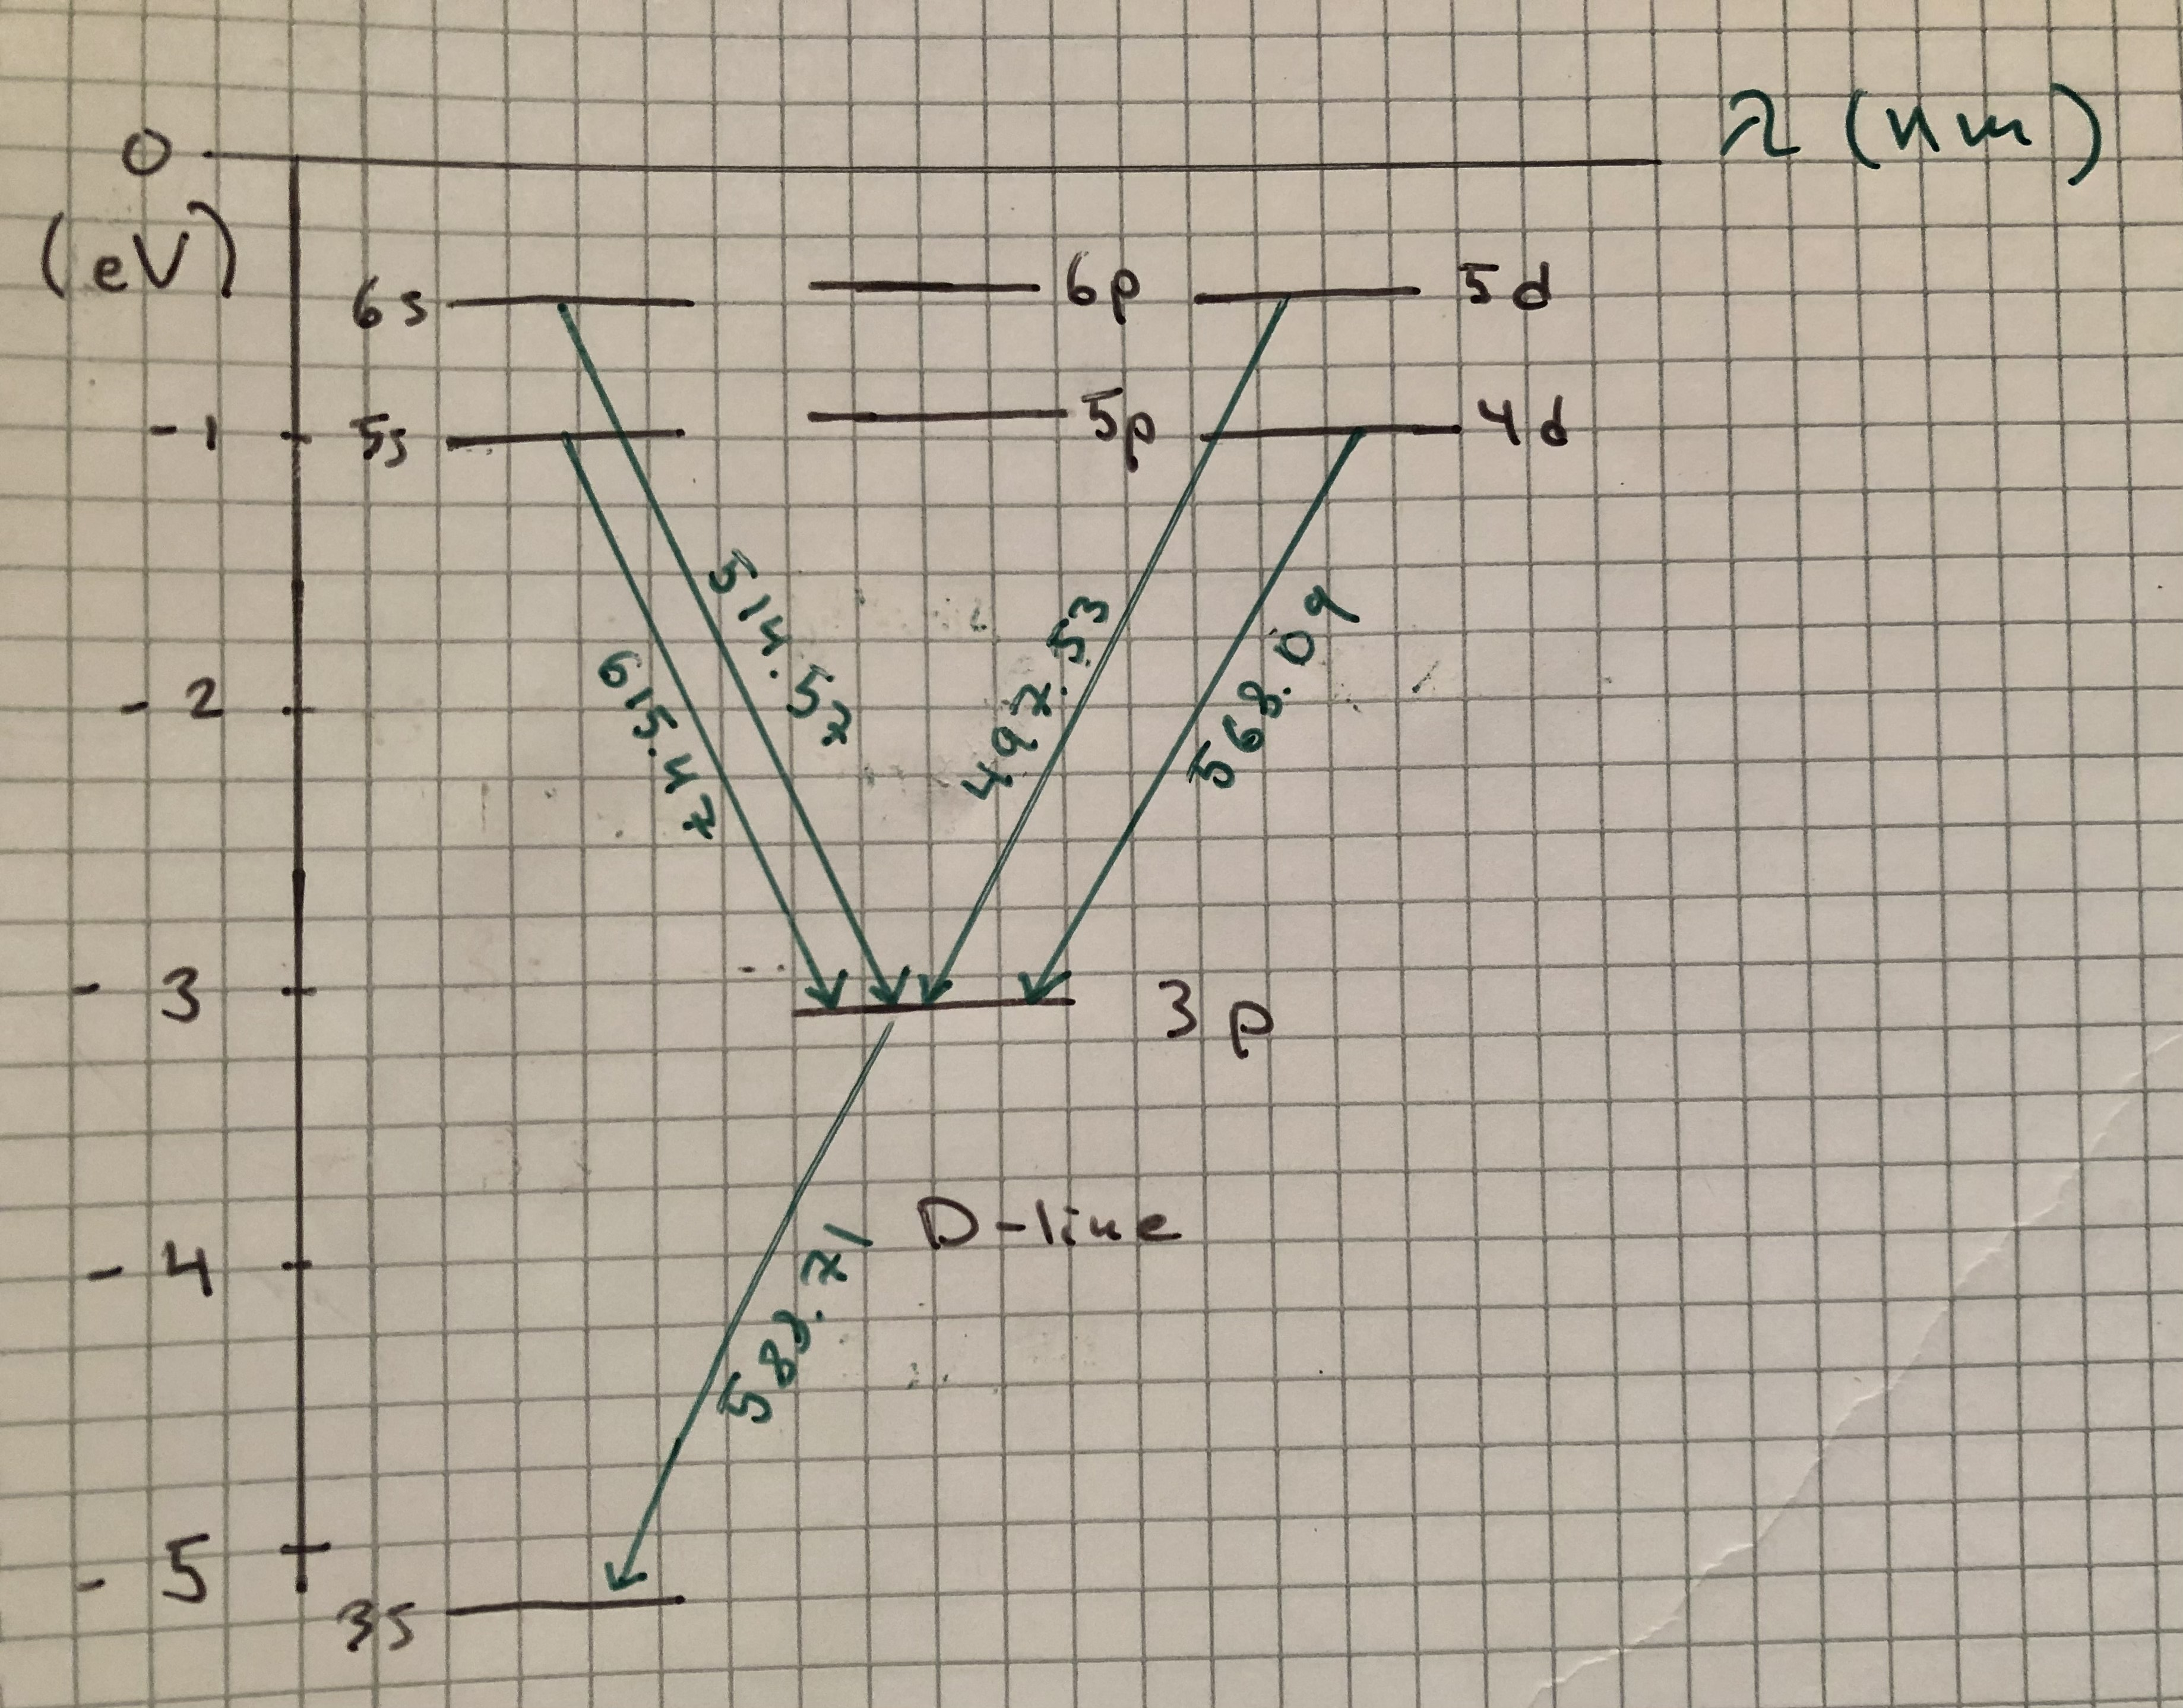


--------------------------------------------------------------------------------------------------------------
# <span style="color:orange">3. Fine structure</span> <a name="fine_structure"></a>
## 3.1 Open file and identify peaks <a name="fine_structure_1"></a>
Plug in the cadmium lamp in the lamp holder and measure a spectrum using the spectrometer **channel** with **small range**, but **high resolution**. Focus on the region **between 340 and 362 nm** when adjusting the **intensity**. In this last part you are supposed to conduct more of the analysis on your own. Try to modify the code in order to extract peak height and position.

<IPython.core.display.Javascript object>


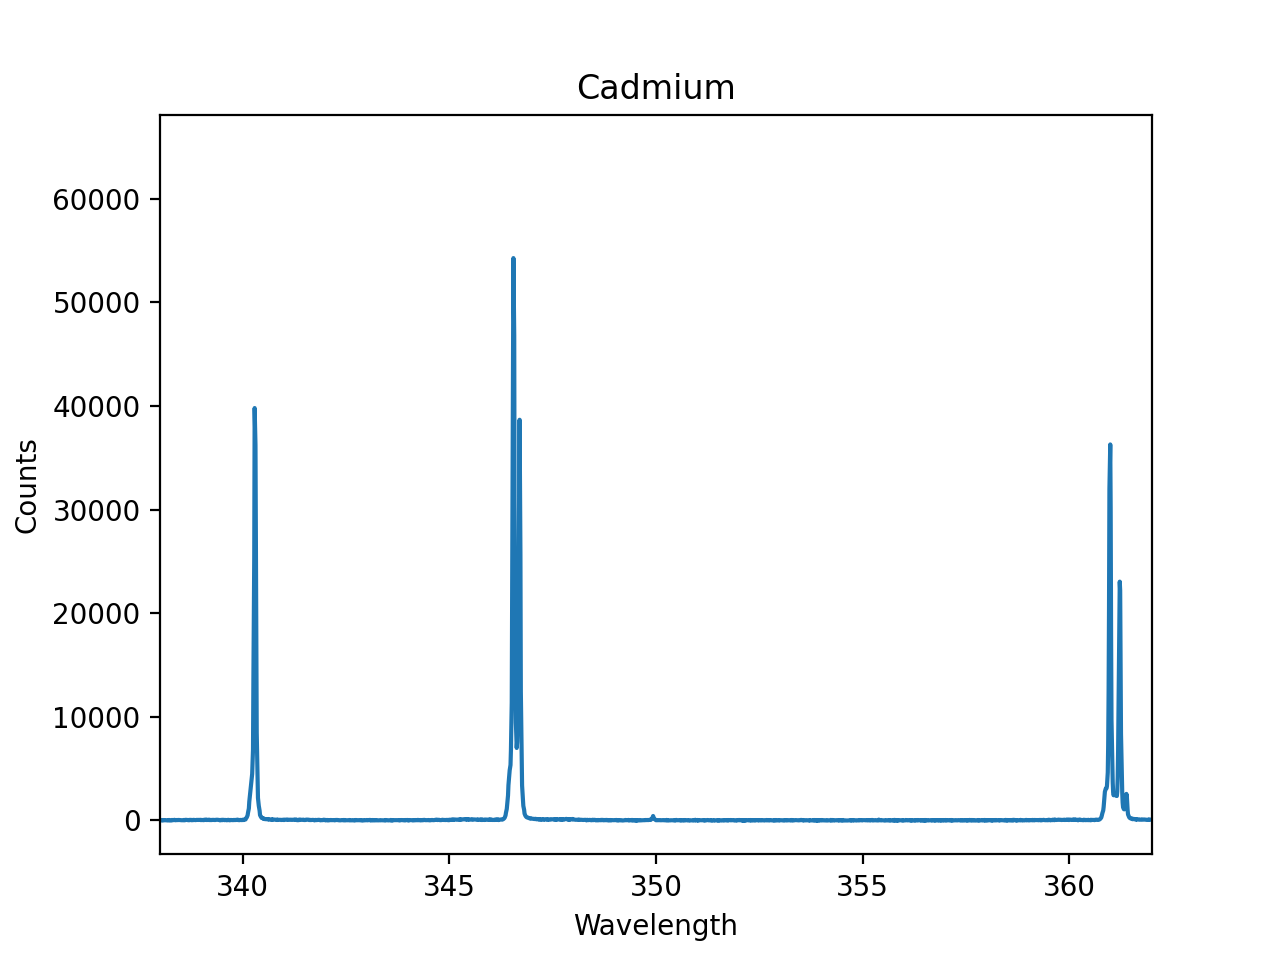

Text(0, 0.5, 'Counts')

In [418]:
# Specify the absolute path for the cadmium spectrum inside quotation marks:
df = pd.read_csv("/Users/filipbrunmark/Atomfysik/FAFF55_Atomic_Spectroscopy_Jupyter_2022/Results/Cd_spec.txt", 
    sep=";",    # Here we specify that values are seperated by semicolons.
    header=6,   # This skips the first rows of the file containing information about the acquisiton settings
                 
    # Check if your spectrum txt file contains of 4 or 5 coulumns. If you have 4 coulumns use the adapted 'names'-array the line below.        
    # names=["Wavelength", "Count sample", "Background", "Reference"])
    names=["Wavelength", "Count sample", "Background", "Reference", "Corrected for dark"])  

df = df.stack().str.replace(',','.').unstack() # Turns the  ',' in the data frame to a point
data = df.to_numpy() #Converts the data frame into an Numpy array
wavelength = np.array(list(data[:, 0]), dtype=float) #Turns the Numpy 2d array in a regular 2D float array
counts = np.array(list(data[:, 4]), dtype=float) # If you have saved 5 coulumns, use the 'Corrected for dark values' by changing the '1' to a '4'.

plt.figure()
plt.plot(wavelength, counts)
plt.show()
plt.title("Cadmium")       # set title of the plot
plt.xlabel("Wavelength")   # set label for x-axis
plt.xlim(338, 362)         # set range for x-axis
plt.ylabel("Counts")       # set label for Y-axis 

<IPython.core.display.Javascript object>


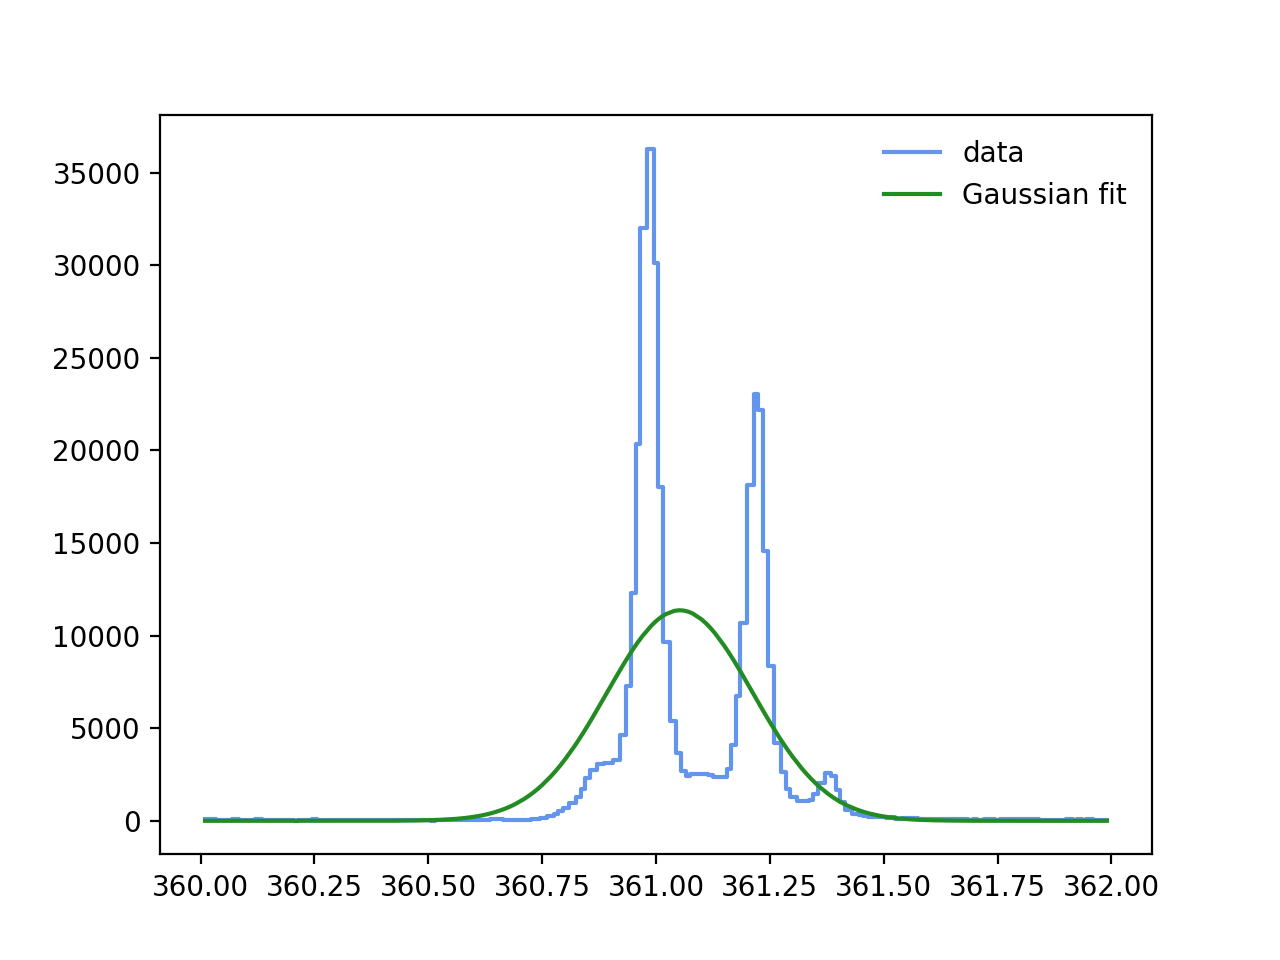

Estimated parameters:
 A = 11369.21487, mu = 361.05231,  sigma = 0.16054 

Uncertainties in the estimated parameters: 
 σ²(A) = 1336391.83171, σ²(mu) = 0.00035, σ²(sigma) = 0.00035 

Covariance matrix: 
 [[ 1.33639183e+06 -1.37688945e-02  1.25870584e+01]
 [-1.37688945e-02  3.54038542e-04  8.46509220e-07]
 [ 1.25870584e+01  8.46509220e-07  3.54743900e-04]]


In [419]:
peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength, 
                                              y=counts,      
                                              region_start=360,   # bins where to start fitting
                                              region_stop=362,    # bins where to stop fitting
                                              mu_guess=361,       # guess for the position of peak centroid
                                              A_guess=40000,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

* Determine the vacuum wavelengths of as many lines as possible in the wavelength range 340-362 nm of your collected spectra.
* Identify the cadmium transitions corresponding to the different spectral lines and make sure that you find a multiplet with in total six transitions.
* Determine the relative energies of the fine structure levels of the two involved triplets.

Create a table for all the identified spectral lines including the vacuum wavelengths and the energy levels involved in the transitions

In [421]:
## We also found 3P 1 -> 1D 2 transition on 349.92 nm
### Write your results here.

Cadmium_wavelength = ([340.29 , 346.55, 346.70, 349.92, 360.99, 361.22, 361.39])
next_row = (["3P 0 -> 3D 1" , "3P 1 -> 3D 2", "3P 1 -> 3D 1", "3P 1 -> 1D 2", "3P 2 -> 3D 3", "3P 2 -> 3D 2", "3P 2 -> 3D 1"])
Cadmium_vac_wavelength = list(map(lambda e: round(e * 1.0003,2), Cadmium_wavelength))



E_SO_3P_0to1 = h_eV * c * 10**(9) * (1/Cadmium_vac_wavelength[0] - 1/Cadmium_vac_wavelength[2]);
E_SO_3P_1to2 = h_eV * c * 10**(9) * (1/Cadmium_vac_wavelength[2] - 1/Cadmium_vac_wavelength[6]);

E_SO_3D_1to2 = h_eV * c * 10**(9) * (1/Cadmium_vac_wavelength[5] - 1/Cadmium_vac_wavelength[6]);
E_SO_3D_2to3 = h_eV * c * 10**(9) * (1/Cadmium_vac_wavelength[4] - 1/Cadmium_vac_wavelength[5]);

pd.DataFrame([Cadmium_wavelength, Cadmium_vac_wavelength, next_row], columns=['1', '2', '3','4', '5', '6', '7'], index=['Wavelength / nm', 'Vaccum wavelength / nm' ,'label'])



1             2             3  \
Wavelength / nm               340.29        346.55         346.7   
Vaccum wavelength / nm        340.39        346.65         346.8   
label                   3P 0 -> 3D 1  3P 1 -> 3D 2  3P 1 -> 3D 1   

                                   4             5             6             7  
Wavelength / nm               349.92        360.99        361.22        361.39  
Vaccum wavelength / nm        350.02         361.1        361.33         361.5  
label                   3P 1 -> 1D 2  3P 2 -> 3D 3  3P 2 -> 3D 2  3P 2 -> 3D 1

In [422]:
## ENERGIES
print("3P")
print("E_SO(J=0) =", 0, "eV");
print("E_SO(J=1) =", E_SO_3P_0to1, "eV");
print("E_SO(J=2) =", E_SO_3P_1to2 + E_SO_3P_0to1, "eV");

print("3D")
print("E_SO(J=1) =", 0, "eV");
print("E_SO(J=2) =", E_SO_3D_1to2, "eV");
print("E_SO(J=3) =", E_SO_3D_2to3 + E_SO_3D_1to2, "eV");

3P
E_SO(J=0) = 0 eV
E_SO(J=1) = 0.06732377910663065 eV
E_SO(J=2) = 0.21270097336808635 eV
3D
E_SO(J=1) = 0 eV
E_SO(J=2) = 0.001613626201626792 eV
E_SO(J=3) = 0.0037991858565094667 eV


## 3.2 Conduct the analysis <a name="fine_structure_2"></a>
Check whether the fine structure of the studied terms in agreement with the Landé interval rule. If not, what is a possible reason for this? Use the empty code box below to write your own code. 

In [423]:
E_SO_3P_0 = 0
E_SO_3P_1 = E_SO_3P_0to1
E_SO_3P_2 = E_SO_3P_1to2 + E_SO_3P_0to1

E_SO_3D_1 = 0
E_SO_3D_2 = E_SO_3D_1to2
E_SO_3D_3 = E_SO_3D_1to2 + E_SO_3D_2to3

print((E_SO_3P_2 - E_SO_3P_1)/(E_SO_3P_1 - E_SO_3P_0))
print((E_SO_3D_3 - E_SO_3D_2)/(E_SO_3D_2 - E_SO_3D_1))


2.159373644655335
1.3544398651182552


#### Discussion Landé interval rule
The results of our energy splitting calculation do not exactly obey the Landé interval rule. It is a bit more off than titanium but much less than mercury. This could be due to measurement error. However, this is also in line with the fact that the interval rule is most accurate in the LS-coupling scheme and less so in jj-coupling. The transition from LS- to jj-coupling is made when the atomic number Z is increased. That cadmium falls in between mercury and titanium in accuracy is therefore completely logical.

## 3.3 Discussion<a name="fine_structure_3"></a>
Describe your procedure and discuss your results in field below. Compare your result with literature values and do an error estimation. Furthermore, answer the following points:

* Include a drawing of the energy level diagram of cadmium containing the observed transitions (Edit > Insert image).
* There is a hardly visible line around 350 nm. To what energy levels does this transition correspond to? Why is it so weak, and why can we see it at all?

### Procedure:

#### Spectrometer settings:
We put the cadmium lamp in the lamp holder and used the channel with higher grating line density. The range was therefore decreased but the resolution higher. Extra care was taken when the measurements were done due to cadmiums UV-range radiation. One measurement setting configuration was used to acquire one series of measurement values. No more was needed since all peaks of interest were clearly visible. Just as with the other analyses gaussian curves were fitted to acquire values of the peaks as accurately as possible. The transitions were identified for all peaks, respectively, and the relative energies were calculated.

### Cadmium fine structure 

#### Visualization of observed transitions
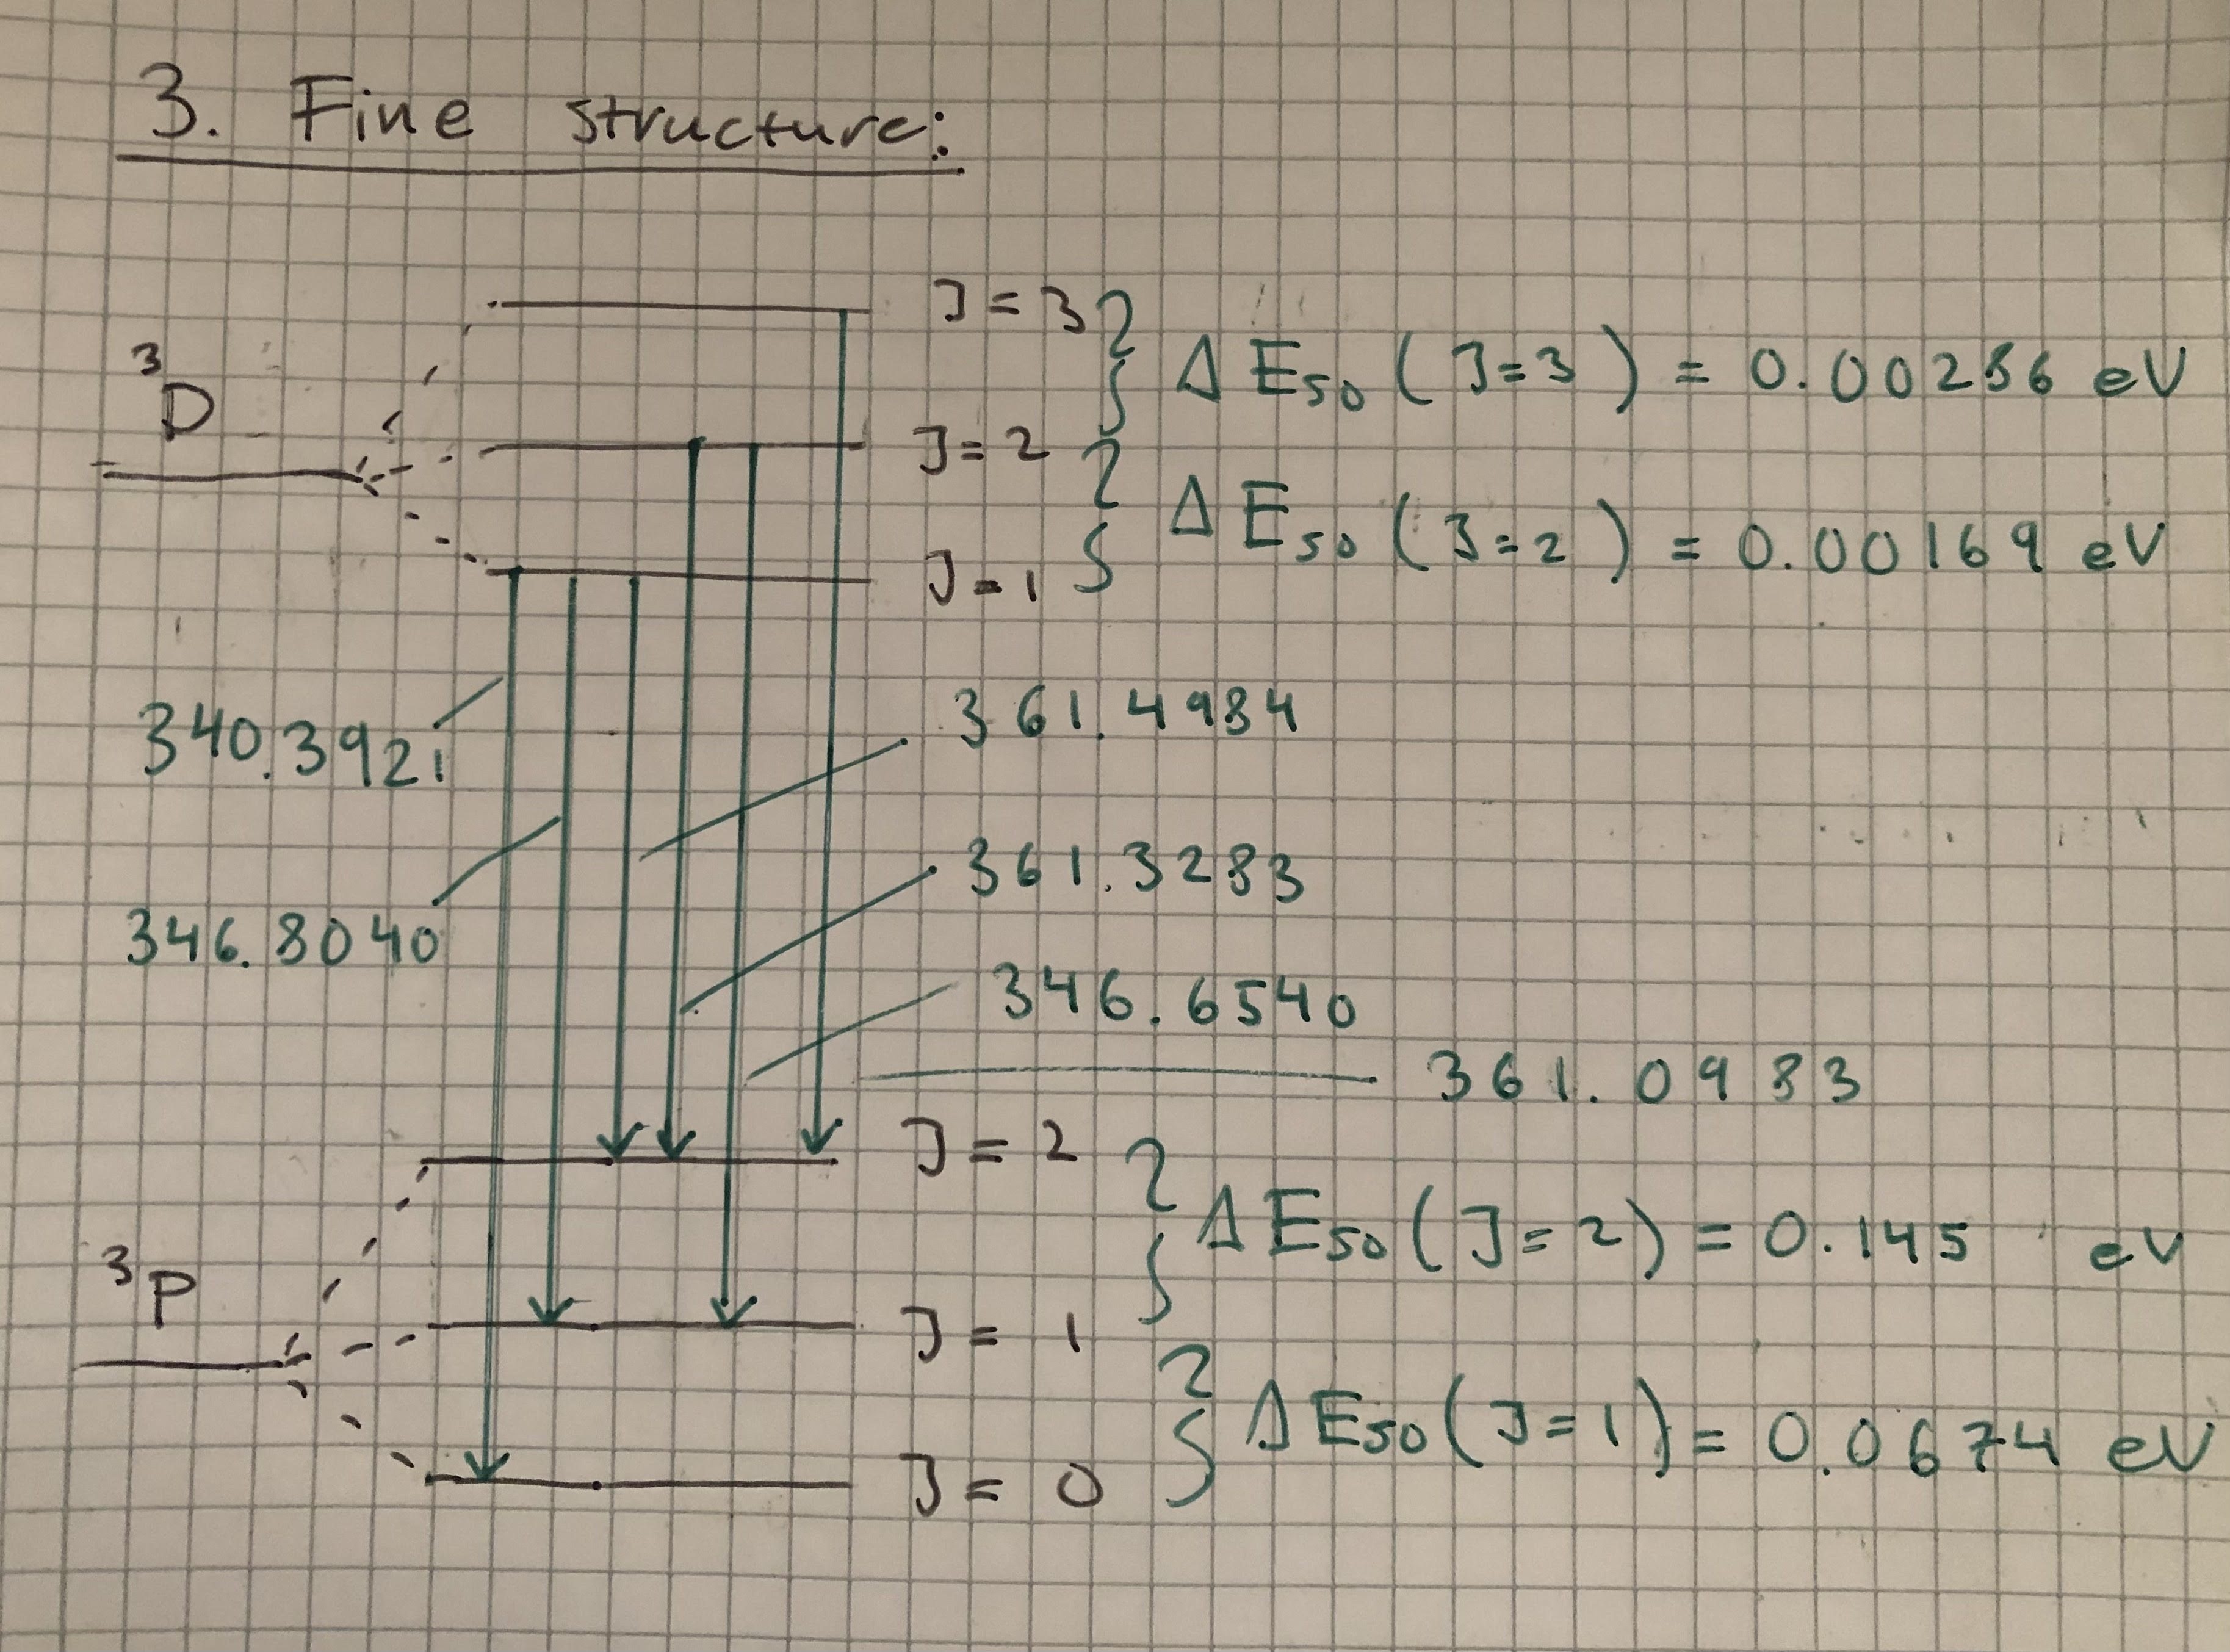

#### 350 nm peak
The hardly visible 350 nm line corresponds to a 3P to 1D transition. This is forbidden according to the electric dipole (E1) transition selection rules. The spin is not allowed to change as it does in this transition. However, there are other photon-atom interaction possibilities, above all M1 and E2 transitions. These occur on a much slower timescale, but have different selection rules. They can therefore produce different kinds of transitions with different energies. The time-averaged output will be much lower, though, due to the lower probability of them happening.

